We use the feature in question number 1

In [31]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



In [9]:
lencode = LabelEncoder()

In [18]:
data = pd.read_csv("CustomerMarketingDataset.csv")
newdata = pd.cut(data.Salary, bins = [0,30000,80000,200000], labels=["Low","Average","High"])
data.insert(5,'Salary Group',newdata)


In [47]:
data['Age'] = lencode.fit_transform(data["Age"])
data['Gender'] = lencode.fit_transform(data["Gender"])
data['OwnHome'] = lencode.fit_transform(data["OwnHome"])
data['Married'] = lencode.fit_transform(data["Married"])
data['Location'] = lencode.fit_transform(data["Location"])
data['Salary Group'] = lencode.fit_transform(data["Salary Group"])
data['Children'] = lencode.fit_transform(data["Children"])
data['Catalogs'] = lencode.fit_transform(data["Catalogs"])
data['AmountSpent'] = lencode.fit_transform(data["AmountSpent"])
improvedData = data.drop(['History','Married','Salary','AmountSpent'], axis = 1)
predictData = data.AmountSpent

In [48]:
xtrain,xtest,ytrain,ytest = TTS(improvedData,predictData, test_size = 0.1)
xtrain.shape, ytrain.shape

((900, 7), (900,))

In [49]:
from sklearn.linear_model import LogisticRegression as LR

logreg = LR()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [50]:
ypredict = logreg.predict(xtest)

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        28
           1       0.65      0.68      0.67        22
           2       0.44      0.36      0.40        22
           3       0.62      0.71      0.67        28

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.57      0.56       100



c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


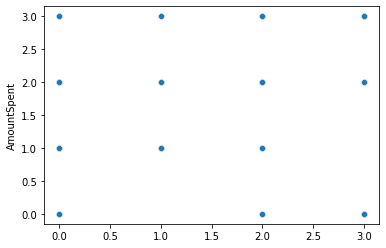

In [51]:
sns.scatterplot(ypredict,ytest)
print(classification_report(ytest,ypredict))

Since the amount spent is a categorical dependent variable, logistic regression can help solving the prediction of the amount spent. To do the process, we have to take the train result of the model and put it into the training model. The logistic model is capabale of having three or more categories which is called as, multinomial logistic regression. In logistic regression, they use cost function to get more accurate result. By using gradient descent, it can train the model to get the minimum of the convex. So the training data will be input to the logistic regression model as it will put the data into the graph. The data in the graph will fit an "s" shaped. Each data will have to find the likelyhood and multiply those likelihood together and it will form the s shaped line. Then the training data will get an input that they will try to predict it using the s shaped line.

In [114]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, max_features = 8)
randfor.fit(xtrain,ytrain)


RandomForestClassifier(max_features=8)

In [115]:
yranpred = randfor.predict(xtest)

              precision    recall  f1-score   support

           0       0.61      0.50      0.55        28
           1       0.86      0.86      0.86        22
           2       0.61      0.64      0.62        22
           3       0.69      0.79      0.73        28

    accuracy                           0.69       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.69      0.69      0.69       100



c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


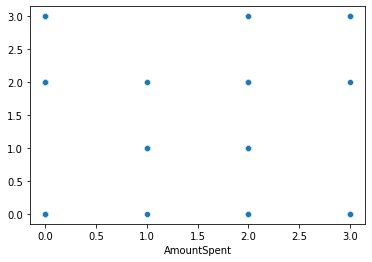

In [116]:
sns.scatterplot(ytest,yranpred)
print(classification_report(ytest,yranpred))

Random forest classifier is the combination of decision trees that can predict categorical values using discrete or continous variables. The data fed into the model will become a decision tree that using the observation(improvedData) and predict the amount spent values. To get the best output of the prediction, there are a lot of decision trees that output a values and within the random forest, the most values will present the predicted values.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors = 25)

In [57]:
knn.fit(xtrain,ytrain)
yknnpred= knn.predict(xtest)

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        28
           1       0.78      0.82      0.80        22
           2       0.50      0.45      0.48        22
           3       0.63      0.79      0.70        28

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.62       100
weighted avg       0.62      0.63      0.62       100



c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


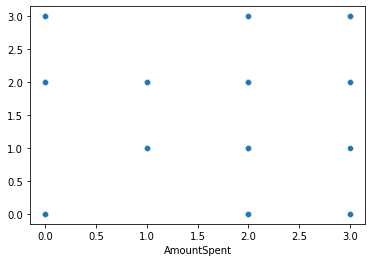

In [61]:
sns.scatterplot(ytest,yknnpred)
print(classification_report(ytest,yknnpred))

The data that is fed into the KNN model, will be plot into the graph by using  all the observation variables and placed the data on the dimension. To predict the categorical values, there must be the n_neighbors factors as the most nearest neighbors in the graph will determine the input value(the independent variable(xtrain)). Then the model will be formed with the data that are plot within the graph and find the nearest data with their respective characteristics and the most neighbors that the input closest to, will determine the output predicted values.

Hyperparameter Tuning

RandomForest hyperparameter tuning will tune the max_features and the n_estimators

In [95]:
from sklearn.model_selection import GridSearchCV
import numpy as np

maxFeatureRange = np.arange(1,9,1)
nEstimatorRange = np.arange(10,210,10)
paramGrid = dict(max_features = maxFeatureRange, n_estimators = nEstimatorRange)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator = rf, param_grid = paramGrid, cv=5)

In [96]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

The gridsearchCV is one of the hyperparameter tunning techniques as they will try to find the optimal max_features and n_estimators of the random forest tree. This technique find the best and accurate result although it is time consuming and computationally expensive. There is another technique if you are using randomizedsearchCV as it will choose random combination but will not obtained an accurate result. In this context the nestimator range is the number of trees and the cv is the votes. It can produce the best parameters and showing the score

In [98]:
print("The best parameters for random forest is %s with a score of %0.2f" %
(grid.best_estimator_, grid.best_score_))

The best parameters for random forest is RandomForestClassifier(max_features=1, n_estimators=140) with a score of 0.62


In [123]:
leaf_size = list(range(1,50))
neighbors = np.arange(1,100,1)
distance = ["euclidean","manhattan","minkowski"]
param_knn = dict(n_neighbors = neighbors, metric = distance)

knn = KNeighborsClassifier()

gridknn = GridSearchCV(estimator = knn, param_grid = param_knn, cv=5)

In [124]:
gridknn.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [125]:
print("The best parameters for KNearestNeighbors is %s with a score of %0.2f" %
(gridknn.best_estimator_, gridknn.best_score_))

The best parameters for KNearestNeighbors is KNeighborsClassifier(metric='manhattan', n_neighbors=10) with a score of 0.65


In [146]:
solver = ["newton-cg","sag","lbfgs","liblinear"]
penalty = ['l1', 'l2', 'elasticnet', 'none']
c = np.logspace(-4,4,20)
param_LR = dict(penalty = penalty, solver = solver, C = c)

logisticregression = LR()

gridLR = GridSearchCV(estimator = logisticregression, param_grid = param_LR, cv=5)

In [147]:
gridLR.fit(xtrain,ytrain)

c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C a

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'sag', 'lbfgs', 'liblinear']})

In [148]:
print("The best parameters for logisticregression is %s with a score of %0.2f" %
(gridLR.best_estimator_, gridLR.best_score_))

The best parameters for logisticregression is LogisticRegression(C=0.615848211066026, solver='newton-cg') with a score of 0.57


In [163]:
logreg = LR(C=0.615848211066026, solver='newton-cg')
logreg.fit(xtrain,ytrain)
randfor = RandomForestClassifier(n_estimators=140, max_features = 1)
randfor.fit(xtrain,ytrain)
knn = KNeighborsClassifier(n_neighbors=10, metric ='manhattan')
knn.fit(xtrain,ytrain)


KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [164]:
yLRpred = logreg.predict(xtest)
yRFpred = randfor.predict(xtest)
yknnpred= knn.predict(xtest)

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        28
           1       0.65      0.68      0.67        22
           2       0.44      0.36      0.40        22
           3       0.62      0.71      0.67        28

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.57      0.56       100



c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


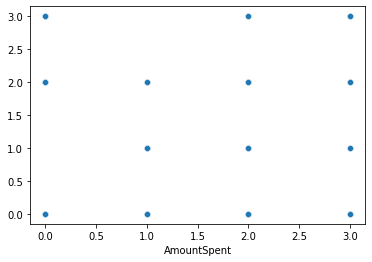

In [165]:
sns.scatterplot(ytest,yLRpred)
print(classification_report(ytest,yLRpred))

The result is similar to the previous one, which shows the score is the same however. This shows there is no need to tune a logistic regression as the result is the same.

              precision    recall  f1-score   support

           0       0.57      0.46      0.51        28
           1       0.81      0.77      0.79        22
           2       0.50      0.50      0.50        22
           3       0.65      0.79      0.71        28

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


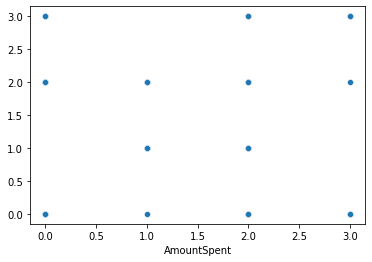

In [168]:
sns.scatterplot(ytest,yRFpred)
print(classification_report(ytest,yRFpred))


Since the training model can be random, the best tune for the random forest is the having max feature = 1, and n_estimators = 140 that will have the score of 0.63

              precision    recall  f1-score   support

           0       0.61      0.50      0.55        28
           1       0.86      0.86      0.86        22
           2       0.61      0.64      0.62        22
           3       0.69      0.79      0.73        28

    accuracy                           0.69       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.69      0.69      0.69       100



c:\Users\minem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


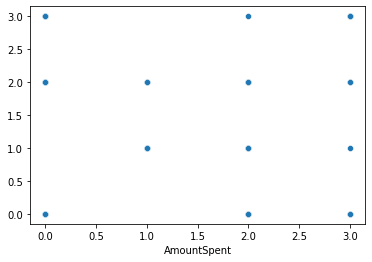

In [169]:
sns.scatterplot(ytest,yknnpred)
print(classification_report(ytest,yranpred))

The best k factor in this model is 10 and use the metric of manhattan distance that have the score of 0.69. This has proven better than a random k factors

To improve the model, we have to add more data to the model to have more varieties of factors and prevent any null values in the dataset as they can train the model better with a good quality dataset. Instead of 1000 data in the dataset, have at least 10000 data so the machine will learn more and can produce an accurate product. Remove unnecessary features that don't have huge contribution to the data. having the data sorted, use hyperparameter tuning.

In [ ]:
REF: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
https://www.youtube.com/watch?v=yIYKR4sgzI8
https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76
https://towardsdatascience.com/understanding-random-forest-58381e0602d2
https://github.com/dataprofessor/code/blob/master/python/hyperparameter_tuning.ipynb
https://www.kaggle.com/questions-and-answers/206121
https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5